In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<font color = "blue">
<font size = 5>
1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv("Sparkling.csv",parse_dates = ['YearMonth'],index_col = 'YearMonth')

In [3]:
df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


* There are 187 rows and 2 columns.
* The time series had 187 time periods data of month wise.

In [4]:
df.isna().sum()

Sparkling    0
dtype: int64

* There is no missing data in the dataset. No need for any imputation of dataset.

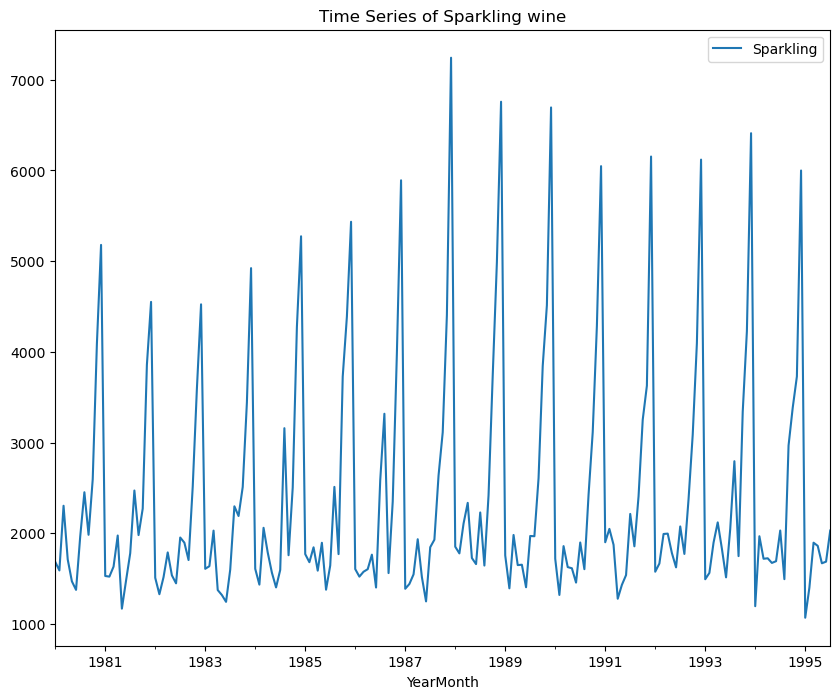

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
df.plot()
plt.title("Time Series of Sparkling wine")
plt.show()

* The plot shows that there is a seasonality and trend in the time series.

<font color = "blue">
<font size = 5>
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [6]:
df.describe().round(2)

,Sparkling
count,187.00
mean,2402.42
std,1295.11
min,1070.00
25%,1605.00
50%,1874.00
75%,2549.00
max,7242.00


**Observations-**
* There is a total of 187 time periods of data with a mean of 2402.42 monthly.
* The Sales of sparkling wine is in the range of 1070 to 7242.

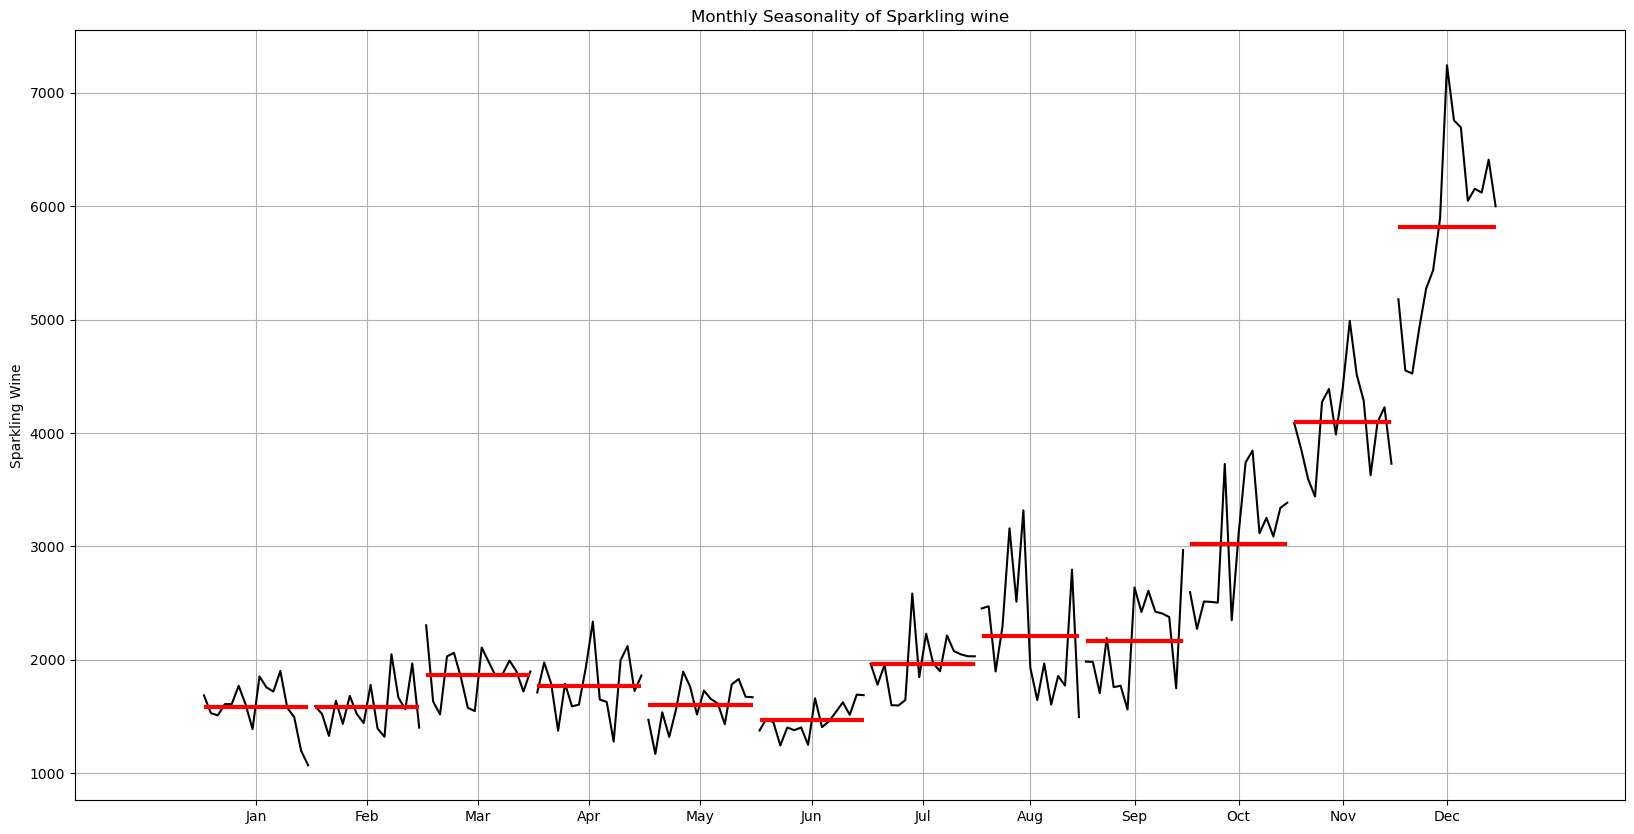

In [7]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(20,10))

month_plot(df,ylabel='Sparkling Wine',ax=ax)
plt.title("Monthly Seasonality of Sparkling wine")
plt.grid();

* The Above graph shows the seasonality of the months for all the years.
* It is clearly visible that the seasonality of sales is high in the months of oct, Nov and Dec. The logical reason for increase in sales of wine is those are winter season.

In [8]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


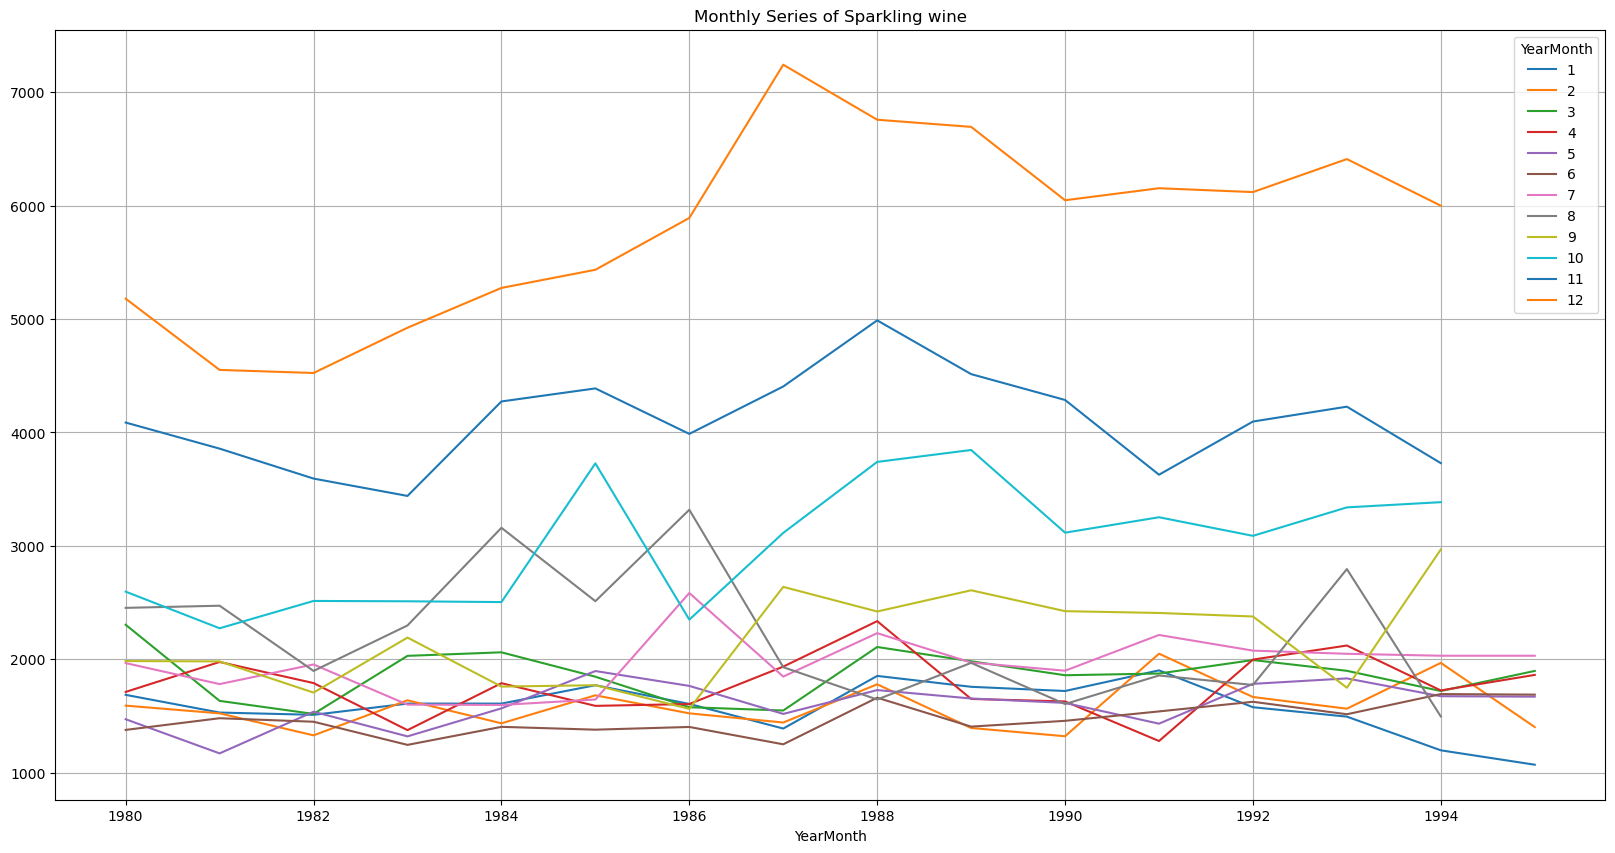

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
yearly_sales_across_months.plot(ax=ax)
plt.title("Monthly Series of Sparkling wine")
plt.grid();

* The monthly trend of wine sales shows that there is an upward trend eventhough the pattern are bit unusual.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

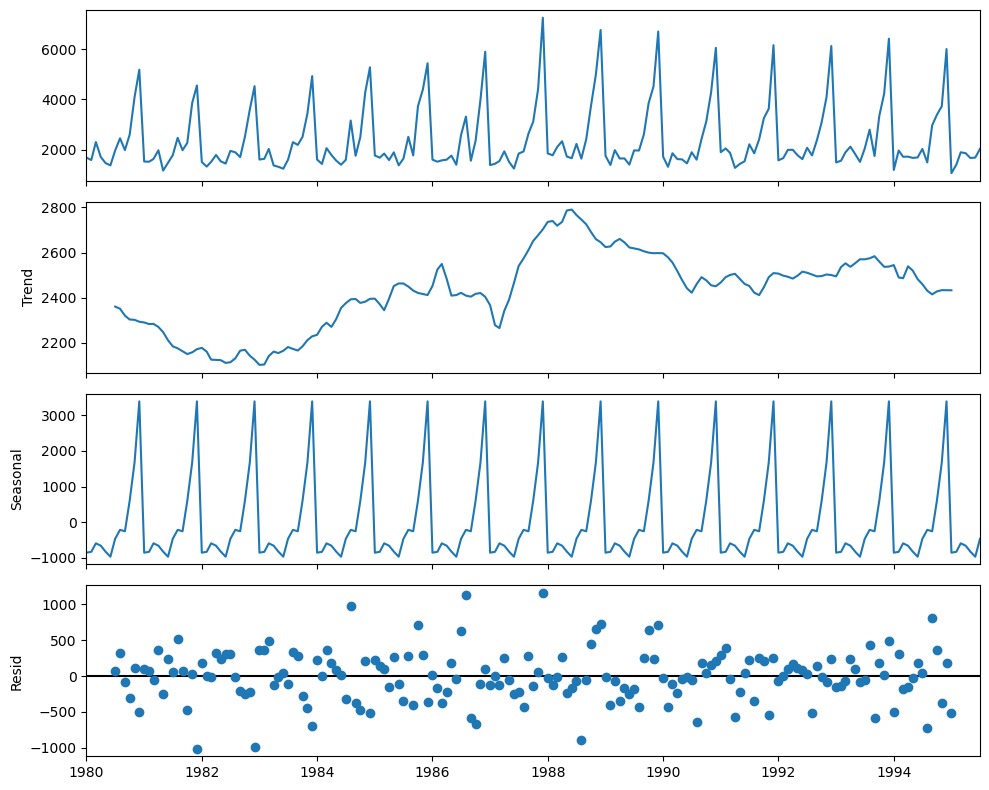

In [11]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

* From the initial plot, it is evident that the time series is addictive.
* After decomposition of time series, trend, seasonality and residual are split in the above plot.

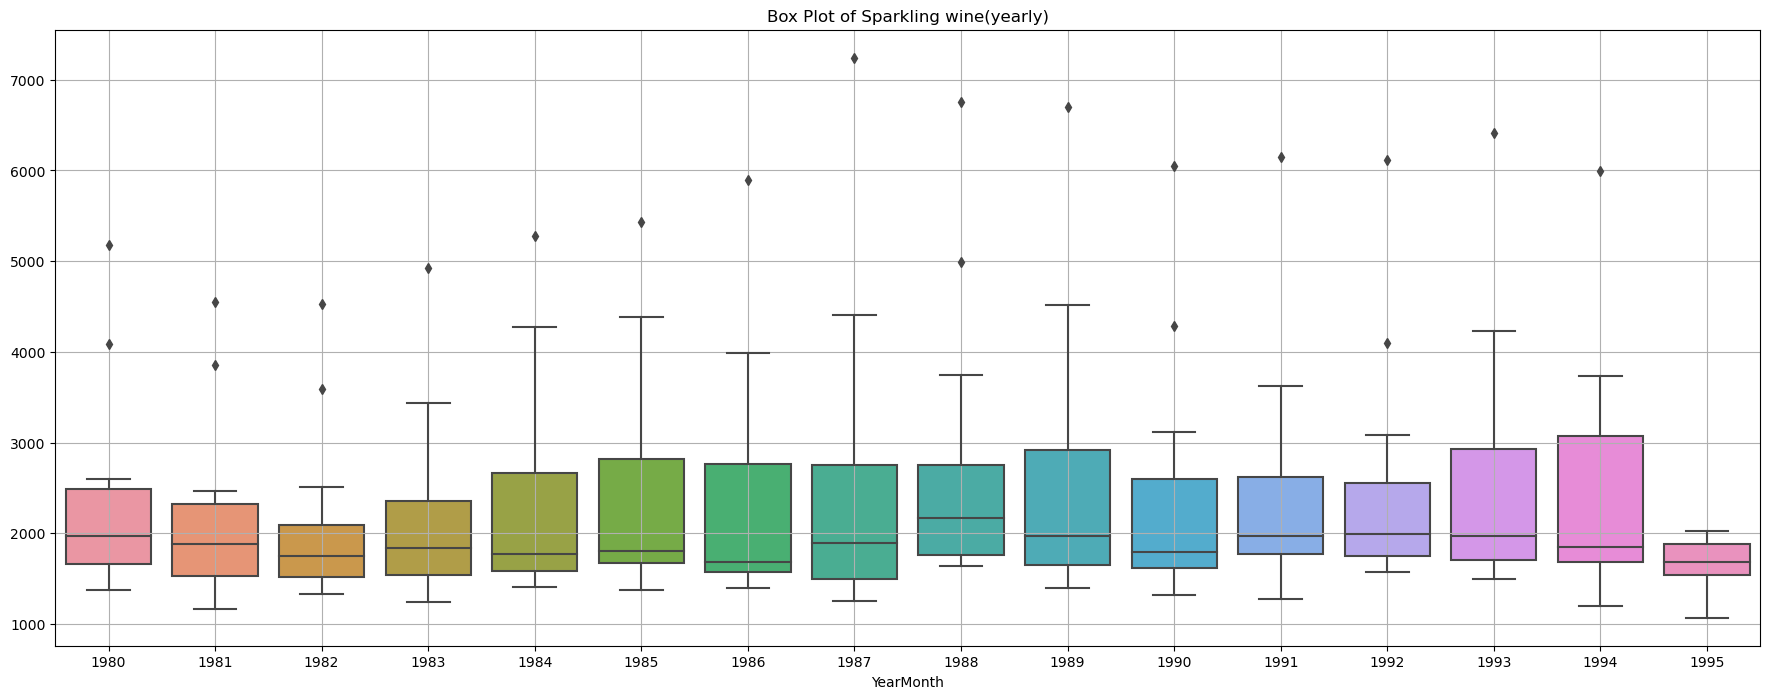

In [12]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title("Box Plot of Sparkling wine(yearly)")
plt.grid();

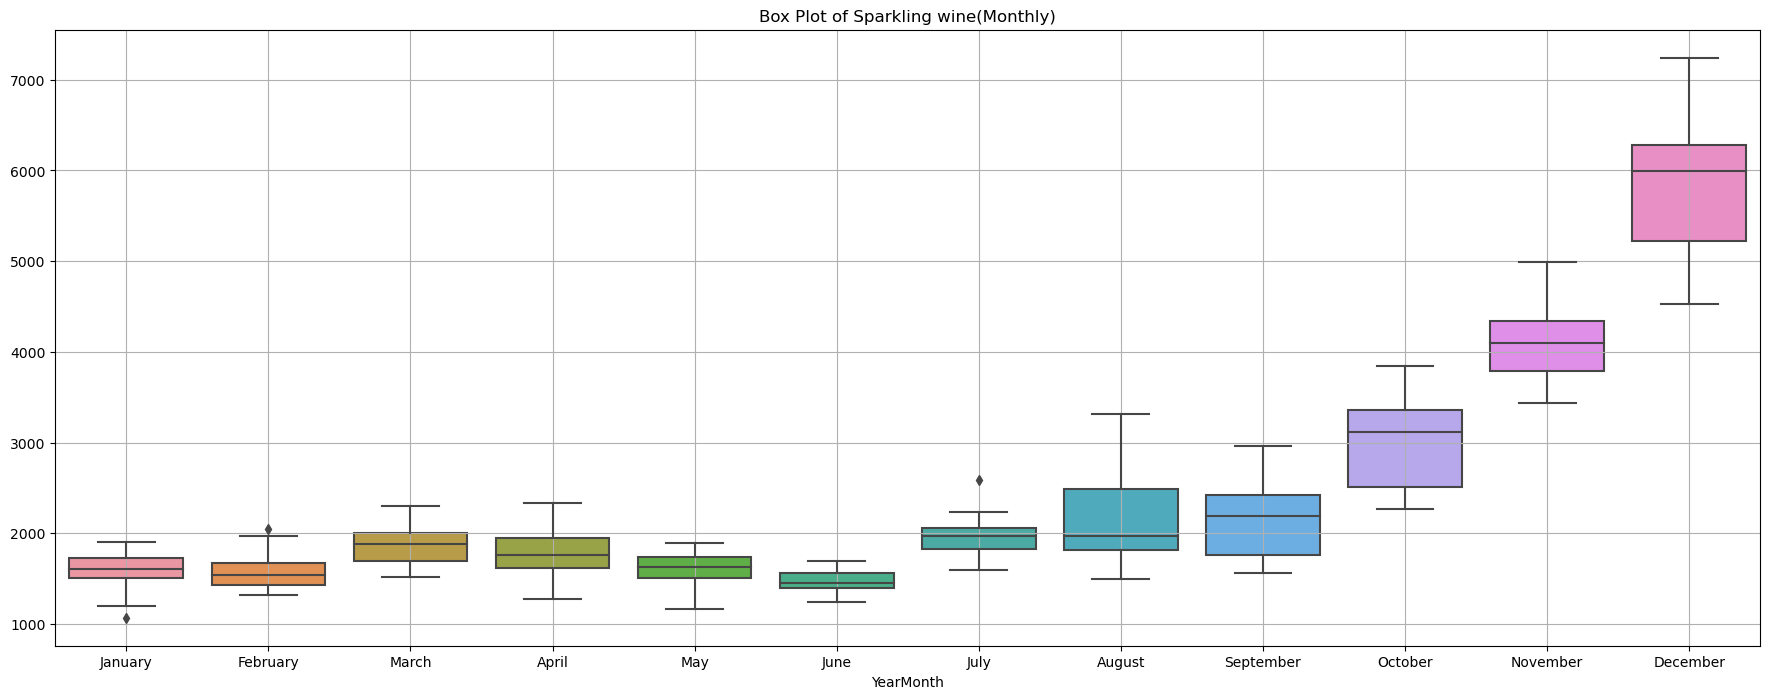

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title("Box Plot of Sparkling wine(Monthly)")
plt.grid();

<font color = "blue">
<font size = 5>
3. Split the data into training and test. The test data should start in 1991.

* The train and test data are split with 1991 as the point of splitting criteria.

In [14]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [15]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


* The train data has 132 monthly data and test has 55 monthly data.

In [16]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [17]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [18]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<font color = "blue">
<font size = 5>
4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression, naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [19]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [20]:
NaiveModel_train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [21]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

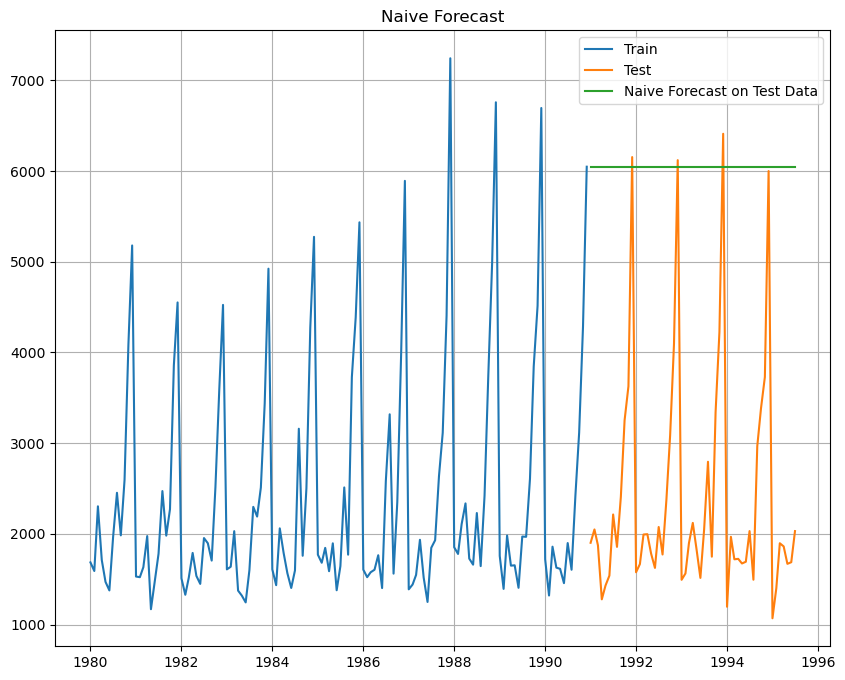

In [22]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [23]:
from sklearn import metrics

In [24]:
rmse_model_Naive_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_Naive_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [25]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model_Naive_test]},index=['Naive forecast'])
resultsDf

,Test RMSE
Naive forecast,3864.279352


In [26]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [27]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


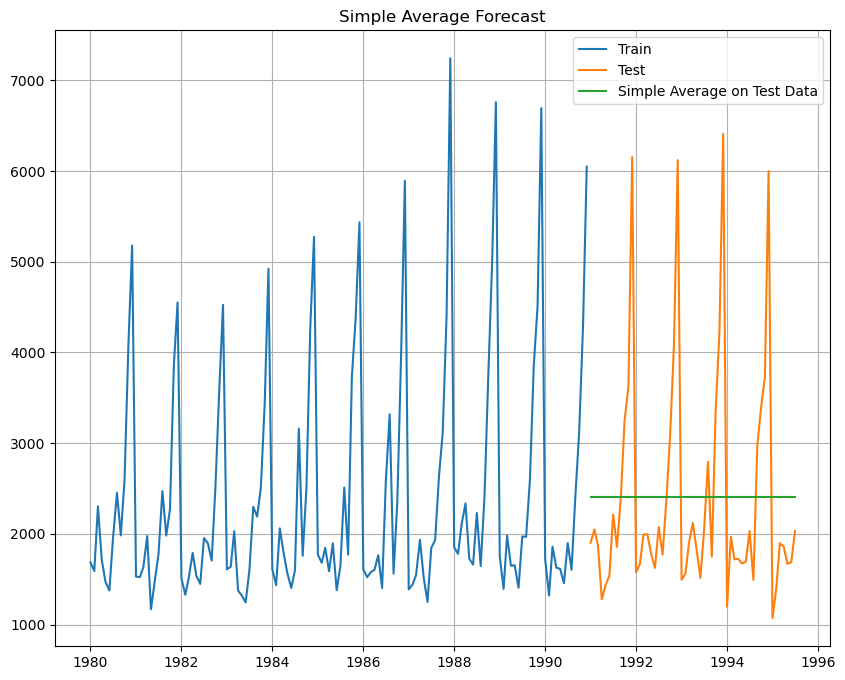

In [28]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [29]:
rmse_model_SAvg_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_SAvg_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [30]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model_SAvg_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

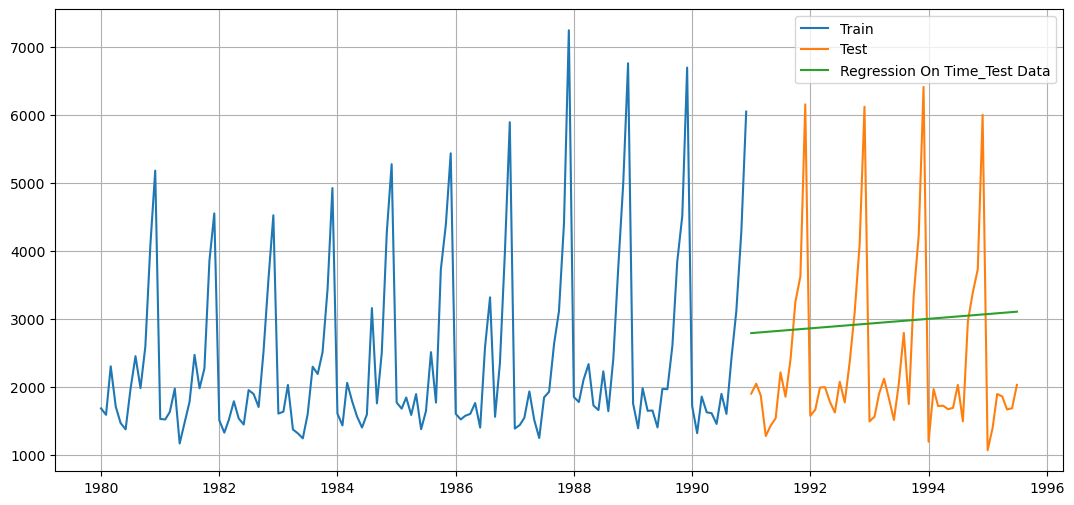

In [36]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [37]:
rmse_model_LR_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [38]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model_LR_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175


In [39]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [40]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


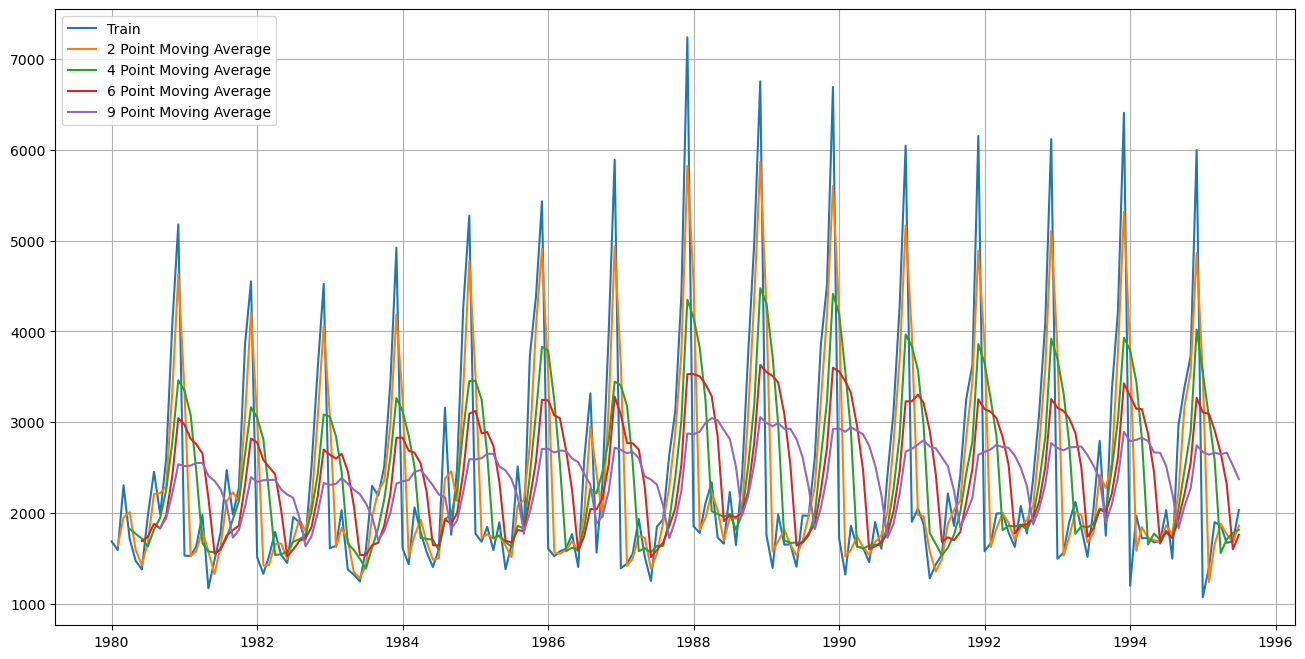

In [41]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [42]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

In [43]:
trailing_MovingAverage_train

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN
...,...,...,...,...,...
1990-08-01,1605,1752.0,1644.00,1677.166667,2199.777778
1990-09-01,2424,2014.5,1846.25,1771.333333,1725.333333
1990-10-01,3116,2770.0,2261.00,2019.333333,1880.444444


In [44]:
trailing_MovingAverage_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111


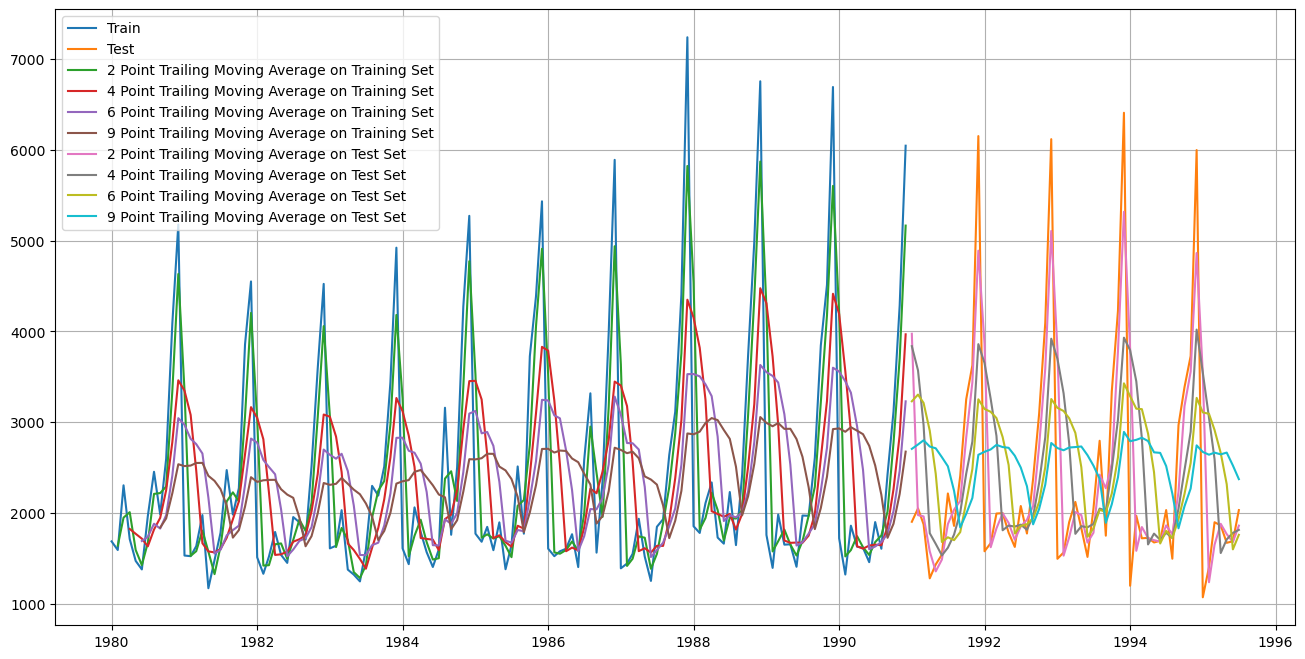

In [45]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [46]:
## 2 point Trailing MA

rmse_model_MA_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_2))

## 4 point Trailing MA

rmse_model_MA_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_4))

## 6 point Trailing MA

rmse_model_MA_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model_MA_test_6))

## 9 point Trailing MA

rmse_model_MA_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [47]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model_MA_test_2,rmse_model_MA_test_4
                                          ,rmse_model_MA_test_6,rmse_model_MA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [48]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [49]:
SES_train = train.copy()
SES_test = test.copy()

In [50]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_SES_autofit = model_SES.fit(optimized=True)

In [52]:
print('')
print('==Simple Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


==Simple Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2676.676366
1991-02-01,2049,2676.676366
1991-03-01,1874,2676.676366
1991-04-01,1279,2676.676366
1991-05-01,1432,2676.676366


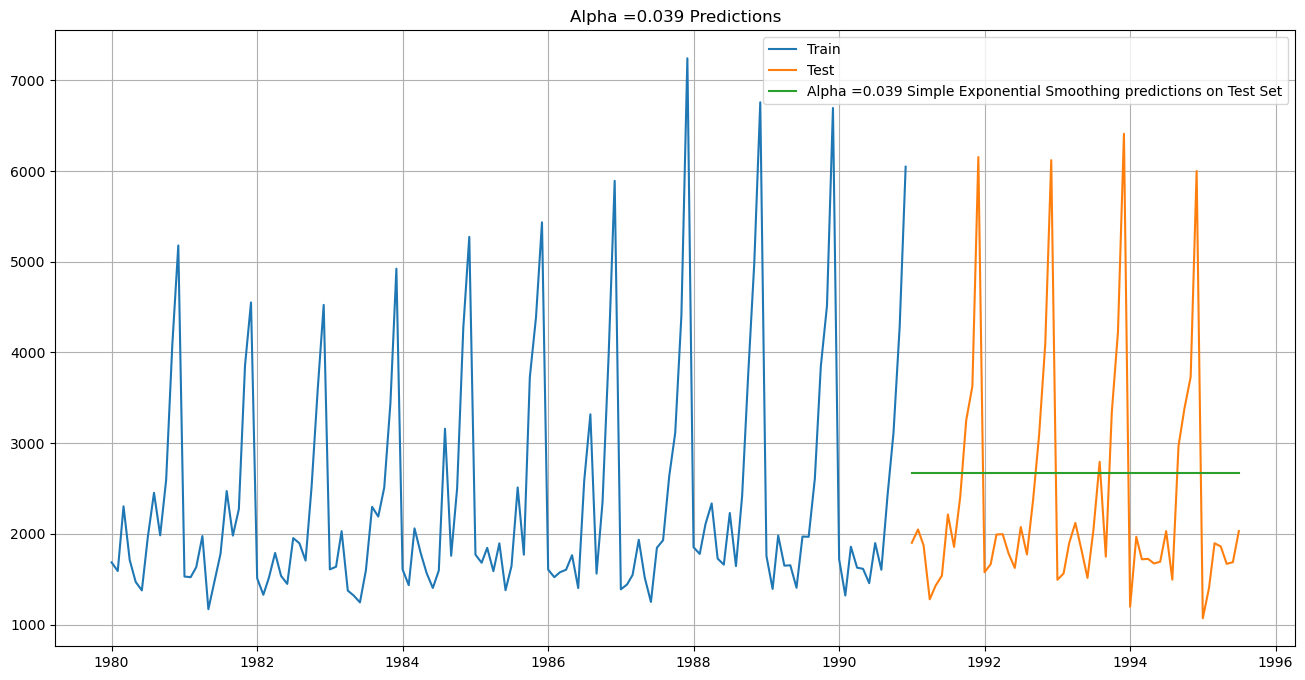

In [54]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.039 Predictions');

In [55]:
rmse_model_SES_test = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_SES_test))

For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [56]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model_SES_test]},index=['Alpha=0.039,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.039,SimpleExponentialSmoothing",1304.927405


In [57]:
DES_train = train.copy()
DES_test = test.copy()

In [58]:
model_DES = Holt(DES_train['Sparkling'],initialization_method='estimated')
model_DES = model_DES.fit(optimized=True)

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [59]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
DES_test['predict'] =  model_DES.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,5330.501799
1991-02-01,2049,5359.520204
1991-03-01,1874,5388.538609
1991-04-01,1279,5417.557013
1991-05-01,1432,5446.575418


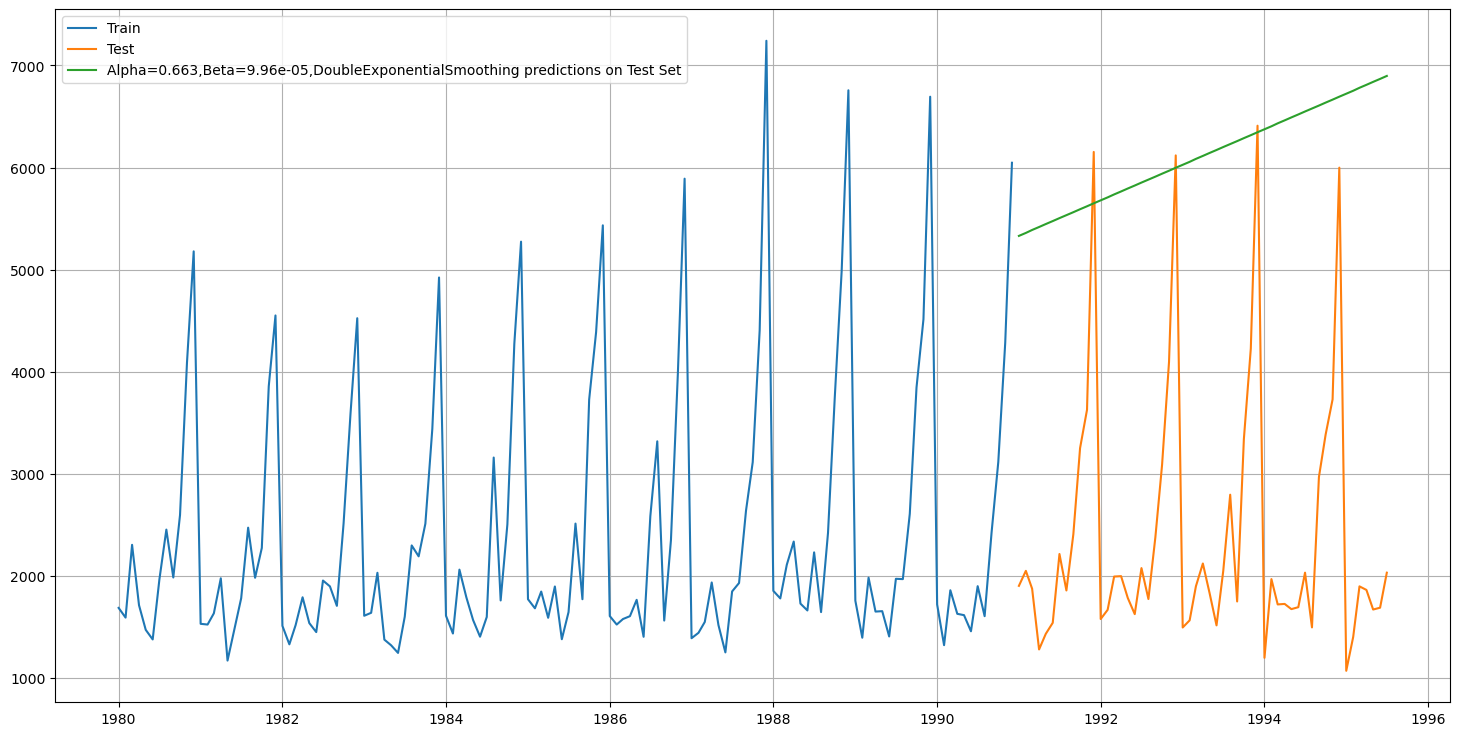

In [61]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [62]:
rmse_model_DES_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing predictions on Test Set, RMSE is %3.3f" %(rmse_model_DES_test))

For Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing predictions on Test Set, RMSE is 3949.993


In [63]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model_DES_test]}
                           ,index=['Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.039,SimpleExponentialSmoothing",1304.927405
"Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing",3949.993290


In [64]:
TES_train = train.copy()
TES_test = test.copy()

In [65]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_TES_autofit = model_TES.fit(optimized=True)

In [67]:
print('')
print('==Holt Triple Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_autofit.params)


==Holt Triple Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11194572287706502, 'smoothing_trend': 0.04979454913988668, 'smoothing_seasonal': 0.3616765678435302, 'damping_trend': nan, 'initial_level': 2356.340229937152, 'initial_trend': -10.519480221963526, 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
       0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
       1.8820382 , 2.38194187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [68]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1586.782642
1991-02-01,2049,1355.896477
1991-03-01,1874,1762.095344
1991-04-01,1279,1655.471900
1991-05-01,1432,1541.320914


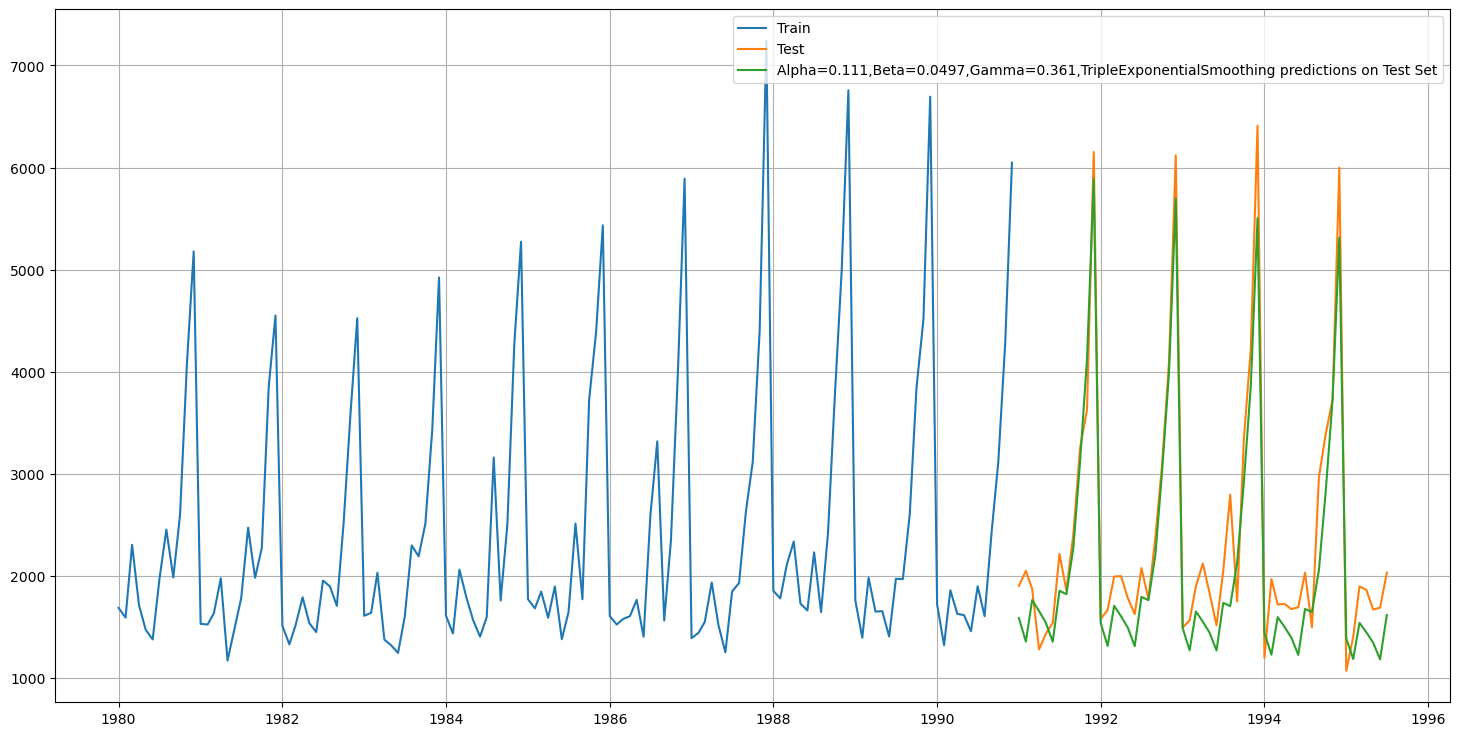

In [69]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [70]:
rmse_model_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0497,Gamma=0.361, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_TES_test))

For Alpha=0.111,Beta=0.0497,Gamma=0.361, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 406.510


In [71]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model_TES_test]}
                           ,index=['Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.039,SimpleExponentialSmoothing",1304.927405
"Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing",3949.993290
"Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing",406.510170


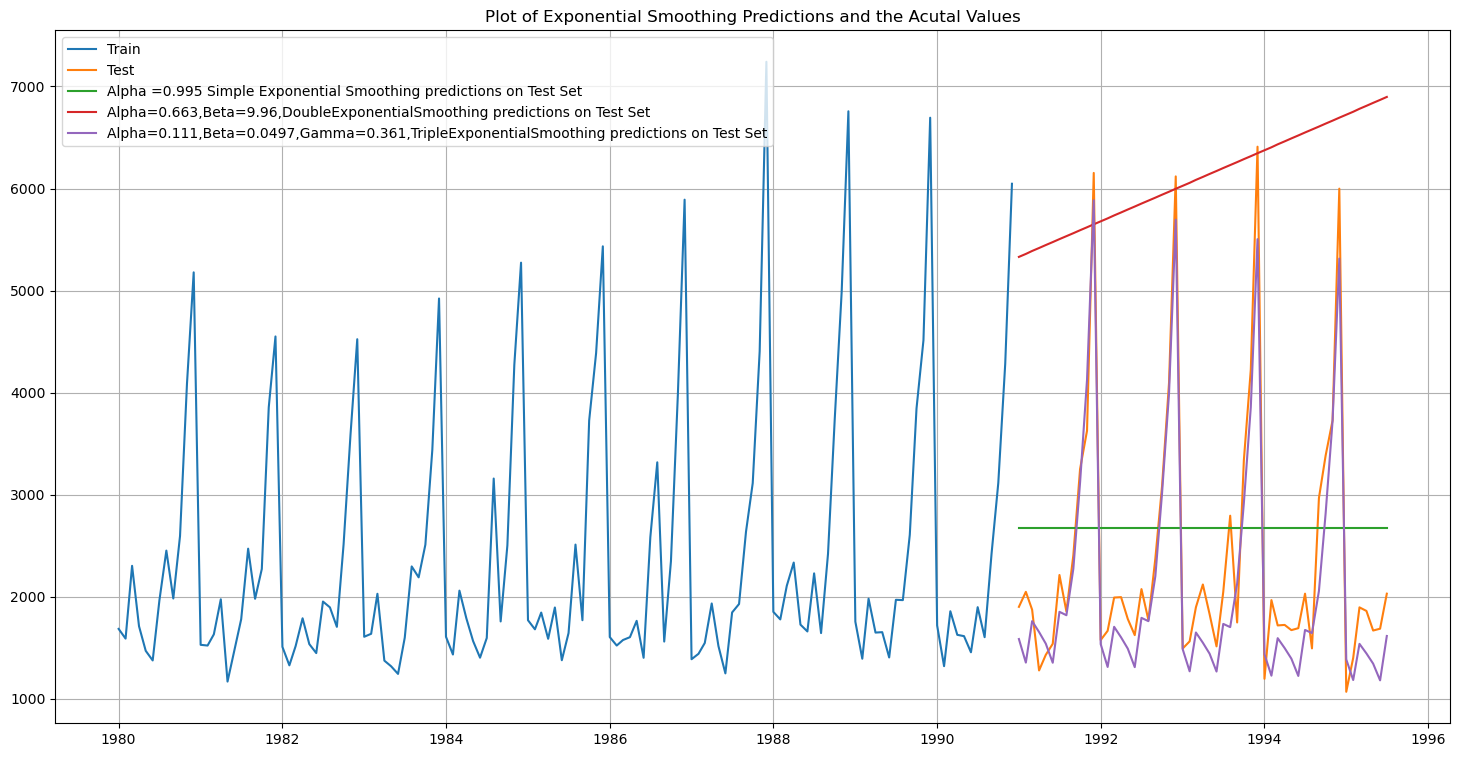

In [72]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.663,Beta=9.96,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [73]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing",406.510170
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.039,SimpleExponentialSmoothing",1304.927405
9pointTrailingMovingAverage,1346.278315
RegressionOnTime,1389.135175
Naive forecast,3864.279352
"Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing",3949.993290


* Based on the models so far Triple exponential smoothing has the best RMSE.

<font color = "blue">
<font size = 5>
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
sparkling_ts = df['Sparkling']

In [76]:
dftest = adfuller(sparkling_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


* The time series is not stationary.

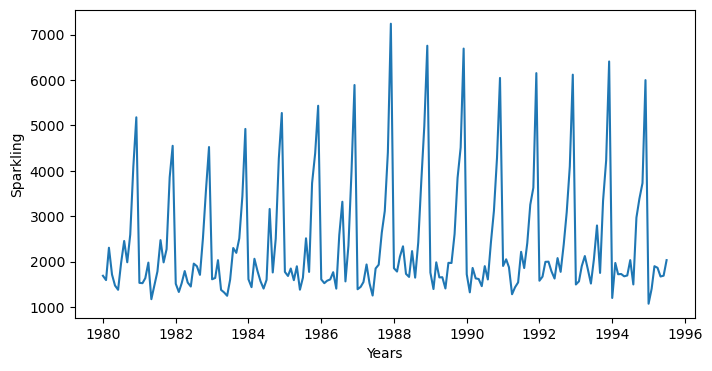

In [77]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')
plt.show()

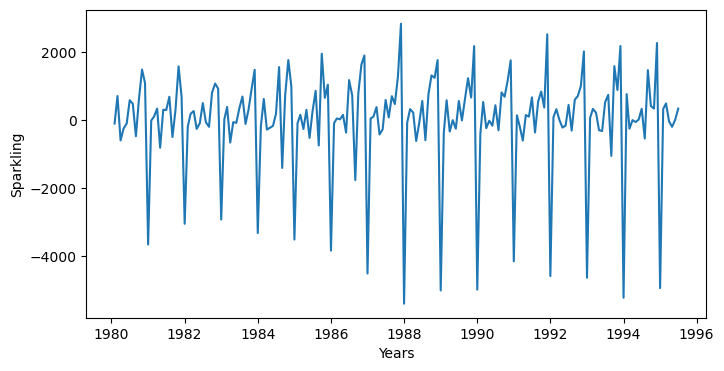

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling')
plt.show()

In [79]:
sparkling_ts_1 = sparkling_ts.diff(periods=1).dropna()
sparkling_ts_1

YearMonth
1980-02-01    -95.0
1980-03-01    713.0
1980-04-01   -592.0
1980-05-01   -241.0
1980-06-01    -94.0
              ...  
1995-03-01    495.0
1995-04-01    -35.0
1995-05-01   -192.0
1995-06-01     18.0
1995-07-01    343.0
Name: Sparkling, Length: 186, dtype: float64

In [80]:
dftest = adfuller(sparkling_ts_1)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -45.050
DF test p-value is 0.0000


* The Time series is stationary after a lag of one.

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

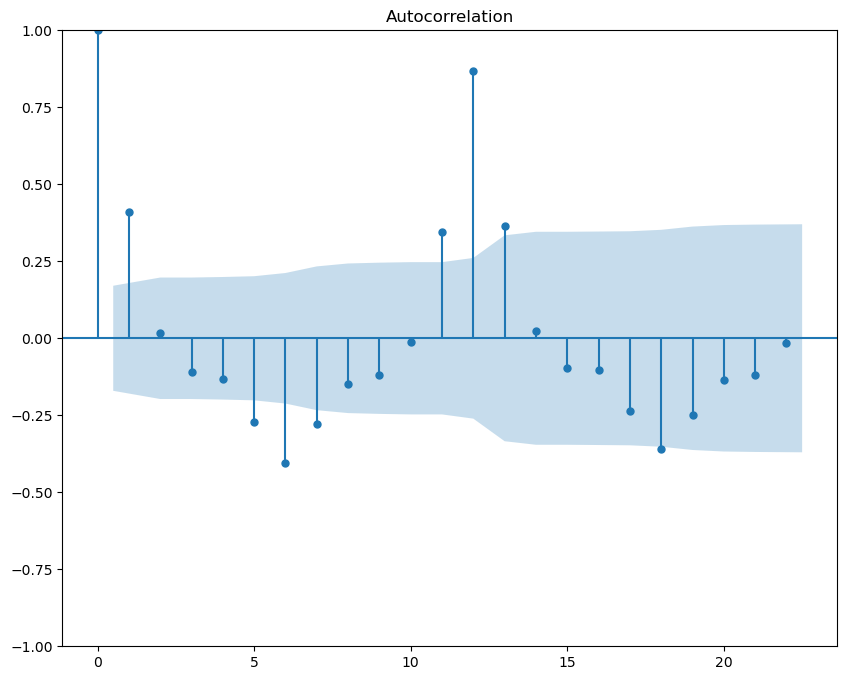

In [82]:
plot_acf(train['Sparkling'],alpha=0.05);

* The auto correlation shows the positive and negative correlation of the data with its lag data series. 
* There are several autocorrelation that ate significantly non-zero. Therefore, the time series is non-random.
* High degree of autocorrelation between adjacent (lag = 1).

<font color = "blue">
<font size = 5>
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [83]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [84]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [85]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334679293


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574251229
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.324390819333


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307793
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866622


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553654667
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230138


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.1083846680017
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023867


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259195554


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137364


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.244881110072


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963643


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.6385888521356
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1741.3207220432205


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.7429039622755


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.4842540776215
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:1601.7587293000872


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1559716178613


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.3988672014411


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:1427.0773417186763


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:1428.5534767510887


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:1386.0237342745174
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1613.7407033410432


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:1441.4259994234035
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1619.6703363508395


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1615.7404485209695


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:1443.1035528176885
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:1440.574162809973


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:1442.5059371245698


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:1444.4274245939364
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1757.3654162744647


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.382736681284


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:1398.756167222287
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1588.0655672689431


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.6724644575665


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.4523886151999


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:1413.567985961235


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:1414.87366816043


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.2732672816956
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.7366275427576


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.9584139019373


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.3477800332057


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:1585.786090092122


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1300441714811


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.137873862365


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:1411.9924109673293


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:1413.5918294342728


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:1385.6887207771656
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:1599.865746566388


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:1429.6023214912796
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:1590.6714007730502


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:1587.514424657486


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.187313588024
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:1413.6736725426256


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:1415.6324293902346


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:1417.3668472985105
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1758.5616376866678


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:1570.1755922610532


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:1400.2098581807336
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.3724067255578


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.857738800849


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.910419970685


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.9854069823039


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735486586


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183456466431
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930706981792


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324122113


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.317618064521


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.116864441199


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892474014


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972420409967


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339992654


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161214413


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846246812


C:\Users\skrsk\AppData\Local\Temp\ipykernel_10504\3259078339.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [86]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
47,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
20,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
50,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
74,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
23,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867


In [87]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_ses_diff = mod.fit()
print(results_SARIMA_ses_diff.summary())

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sat, 16 Dec 2023   AIC                           1382.348
Time:                                    12:07:22   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

In [88]:
predicted_autoSARIMA_ses_diff = results_SARIMA_ses_diff.forecast(steps=len(test))
predicted_autoSARIMA_ses_diff

1991-01-01    1460.244630
1991-02-01    1392.437170
1991-03-01    1743.201698
1991-04-01    1650.066933
1991-05-01    1522.656025
1991-06-01    1365.342195
1991-07-01    1854.399130
1991-08-01    1664.797834
1991-09-01    2343.554290
1991-10-01    3223.021977
1991-11-01    4306.225043
1991-12-01    6199.418135
1992-01-01    1469.490809
1992-02-01    1302.529279
1992-03-01    1707.870377
1992-04-01    1586.390660
1992-05-01    1472.250647
1992-06-01    1303.705895
1992-07-01    1801.976096
1992-08-01    1616.355678
1992-09-01    2288.019621
1992-10-01    3179.400607
1992-11-01    4256.180883
1992-12-01    6158.415603
1993-01-01    1418.870740
1993-02-01    1244.817184
1993-03-01    1654.063674
1993-04-01    1530.433362
1993-05-01    1417.477624
1993-06-01    1248.280722
1993-07-01    1746.910045
1993-08-01    1561.091868
1993-09-01    2232.864712
1993-10-01    3124.185729
1993-11-01    4200.999029
1993-12-01    6103.215563
1994-01-01    1363.680714
1994-02-01    1189.621644
1994-03-01  

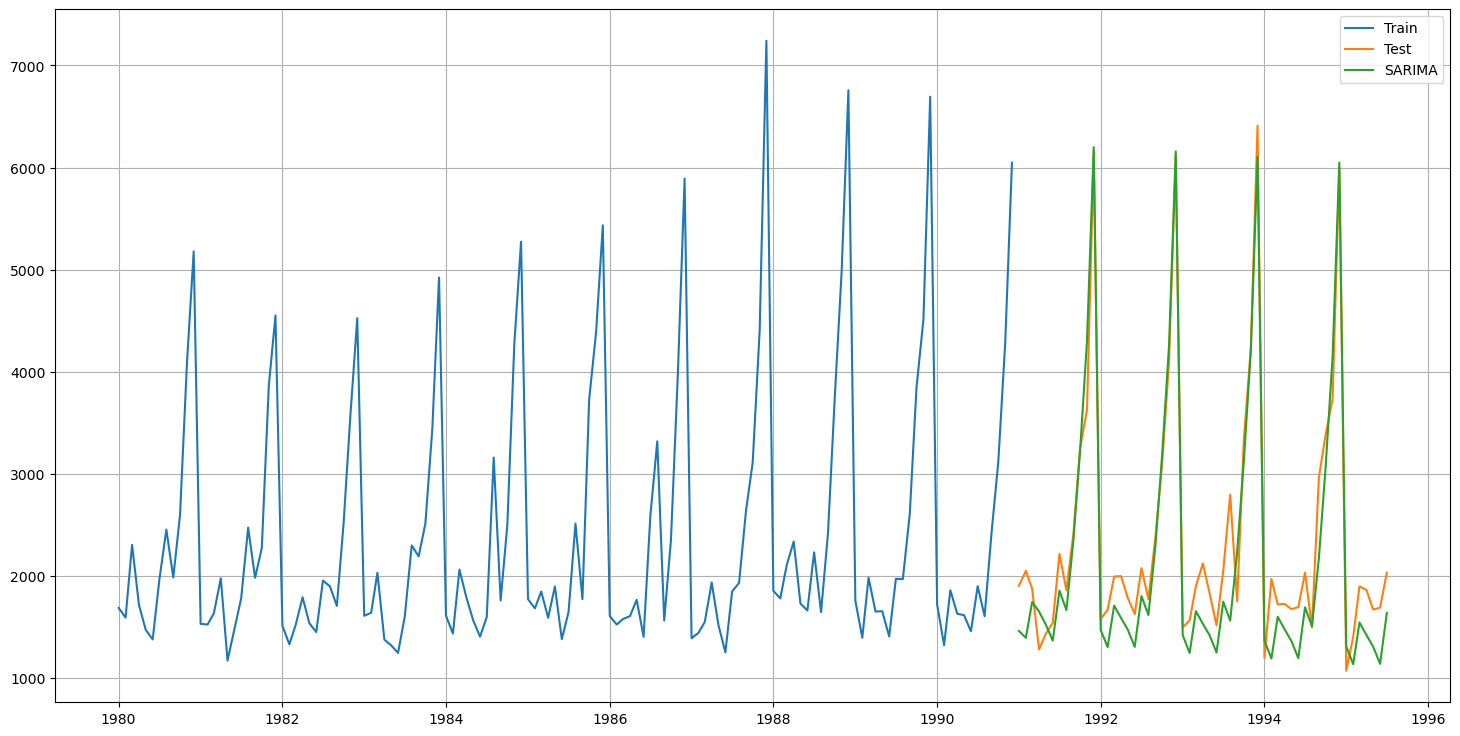

In [89]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_autoSARIMA_ses_diff, label='SARIMA')

plt.legend(loc='best')
plt.grid();

In [90]:
RMSE_autoSARIMA_ses_diff = metrics.mean_squared_error(test['Sparkling'],predicted_autoSARIMA_ses_diff,squared=False)
print("For SARIMA Model forecast on the Test Data,  RMSE is %3.3f" %(RMSE_autoSARIMA_ses_diff))

For SARIMA Model forecast on the Test Data,  RMSE is 382.577


In [91]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA_ses_diff]}
                           ,index=['SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
Naive forecast,3864.279352
SimpleAverageModel,1275.081804
RegressionOnTime,1389.135175
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.039,SimpleExponentialSmoothing",1304.927405
"Alpha=0.663,Beta=9.96e-05,DoubleExponentialSmoothing",3949.993290
"Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing",406.510170


<font color = "blue">
<font size = 5>
7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [92]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE']).round(2)

Sorted by RMSE values on the Test Data: 



,Test RMSE
SARIMA,382.58
"Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing",406.51
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59
SimpleAverageModel,1275.08
6pointTrailingMovingAverage,1283.93
"Alpha=0.039,SimpleExponentialSmoothing",1304.93
9pointTrailingMovingAverage,1346.28
RegressionOnTime,1389.14
Naive forecast,3864.28


* The Best model is SARIMA with lowest RMSE of 382.58.

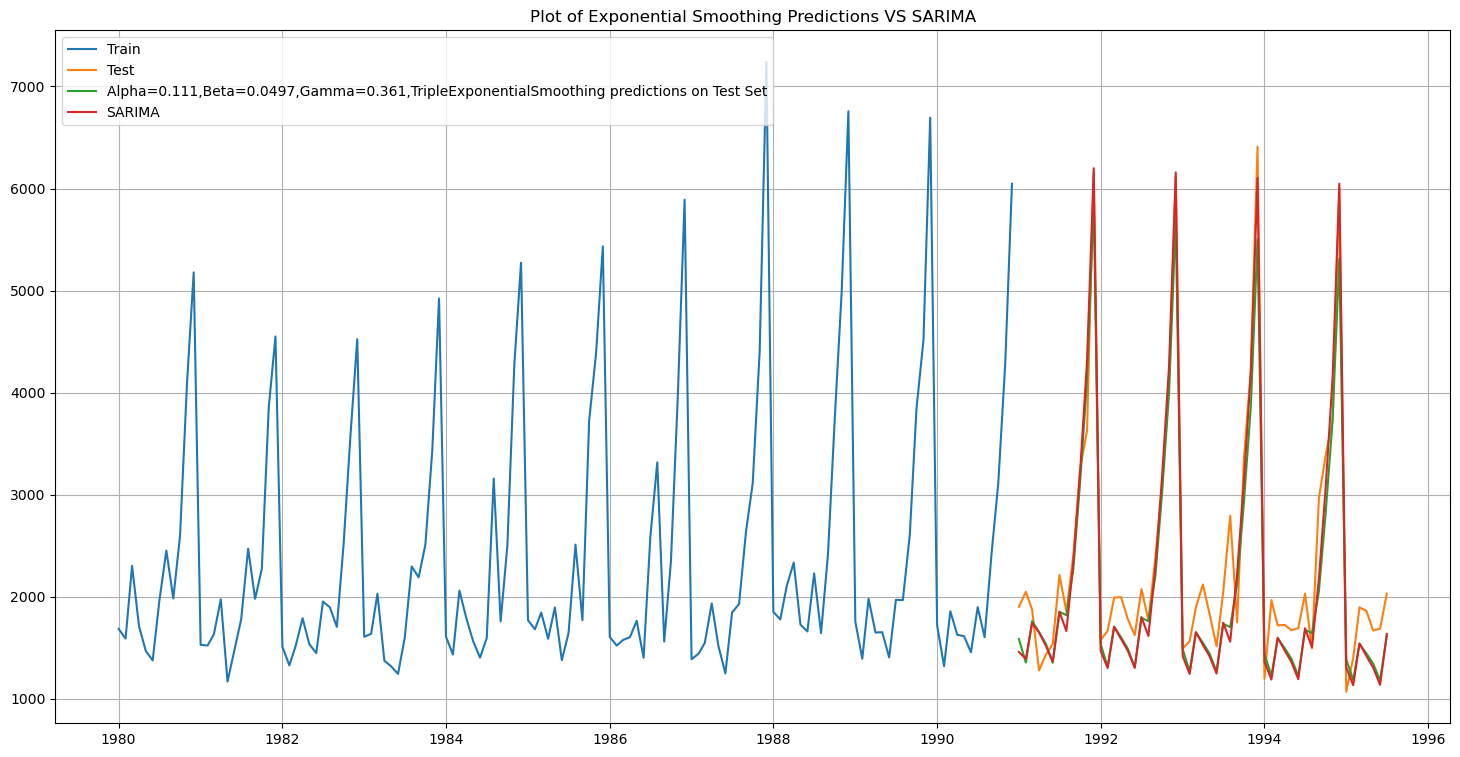

In [93]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0497,Gamma=0.361,TripleExponentialSmoothing predictions on Test Set')
plt.plot(predicted_autoSARIMA_ses_diff, label='SARIMA')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions VS SARIMA');

<font color = "blue">
<font size = 5>
8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [94]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1086.537
Date:                            Sat, 16 Dec 2023   AIC                           2185.074
Time:                                    12:07:24   BIC                           2203.017
Sample:                                01-01-1980   HQIC                          2192.364
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.367     -1.527      0.127      -1.279       0.159
ma.L1         -0.2810      0.339   

In [95]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1995-08-01'), dynamic=True)

In [96]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [97]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

C:\Users\skrsk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [98]:
forecast_fullmodel_autosarima = pred95.predicted_mean

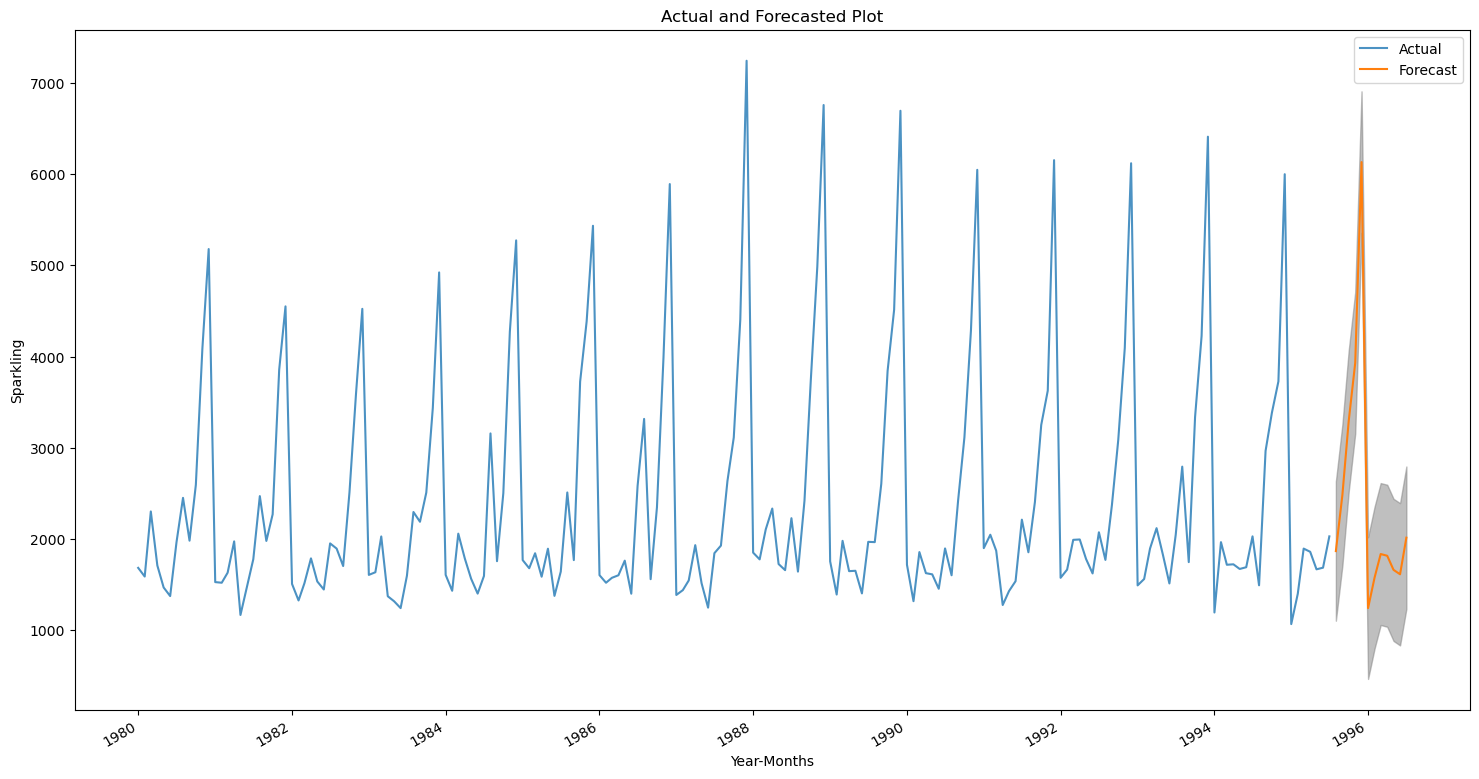

In [99]:
plt.figure(figsize=(18,10))
plt.plot(df.index,df['Sparkling'], label='Actual',alpha=0.8)
forecast_fullmodel_autosarima.plot(label='Forecast')
plt.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='Grey', alpha=0.5)
plt.title("Actual and Forecasted Plot")
plt.xlabel('Year-Months')
plt.ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

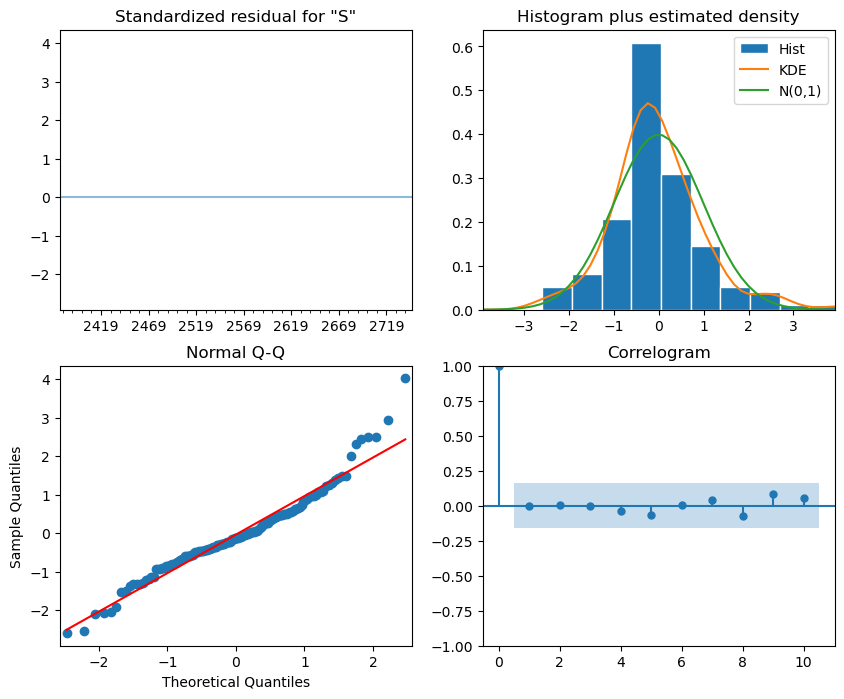

In [100]:
results_SARIMA_fullmodel.plot_diagnostics();